In [1]:
import os
import numpy as np
import pandas as pd

ID = 'GX010049'
preprocessed_path = 'data/interpolation/{0}.csv'.format(ID)
data = pd.read_csv(preprocessed_path)

In [2]:
data.head()

,Milliseconds,AcclX,AcclY,AcclZ,Latitude,Longitude,Altitude,Speed2D,Speed3D,GyroX,GyroY,GyroZ,Accl3D
0,0.000000,-0.468521,1.004796,0.282974,51.514325,-0.118190,55.942000,0.64,0.64,-0.127796,0.010650,0.135250,1.144203
1,5.076142,-0.327034,0.942446,0.340528,51.514325,-0.118189,55.941961,0.64,0.64,-0.128860,0.019169,0.148030,1.054094
2,10.152284,-0.192741,0.760192,0.326139,51.514325,-0.118189,55.941923,0.64,0.64,-0.128860,0.021299,0.150160,0.849357
3,15.228426,-0.183149,0.541966,0.282974,51.514325,-0.118189,55.941884,0.64,0.64,-0.133120,0.021299,0.144835,0.638236
4,20.304569,-0.022477,0.376499,0.273381,51.514325,-0.118189,55.941845,0.64,0.64,-0.140575,0.018104,0.139510,0.465826


In [3]:
from utils.calculate_IRI import *
import time

times_list = (data['Milliseconds'].copy())/1000 #to sec
times_list = times_list.tolist()

a_list = data['AcclX'].copy()

s_list = data['Speed3D'].tolist()

IRI_time_width = 1000 #1000*5 -> 5 seconds per IRI window where IRI covers t-2.5 and t+2.5 period of time 
IRI_time_stride= 1
out_iri_list, out_times_index_list = IRI_sliding_window(times_list, a_list, s_list, IRI_time_width, IRI_time_stride)



131.19853568077087


In [5]:
len(out_iri_list), len(times_list)

(139148, 139148)

In [3]:
index_list = data.index[data['Speed3D']<1].tolist()
reset_out_iri_list = out_iri_list.copy()
for i in index_list:
    reset_out_iri_list[i]=0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


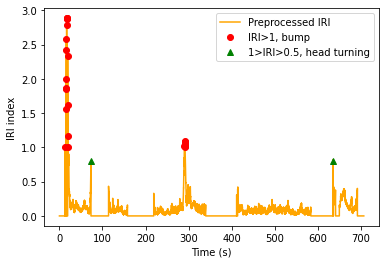

In [6]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
x = np.array(reset_out_iri_list)
thres = 1
times_list = np.array(times_list)
peaks, _ = find_peaks(x, height=thres)

plt.plot(times_list, reset_out_iri_list, color='orange',label='Preprocessed IRI')
plt.plot(times_list[peaks], x[peaks], "o", color='red', label='IRI>{0}, bump'.format(str(thres)))
plt.plot([72.5, 635], [0.8, 0.8], "^", color='green', label='1>IRI>0.5, head turning')
plt.xlabel('Time (s)')
plt.ylabel('IRI index')
plt.legend()
# plt.show()
plt.savefig('IRI_thres_update.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


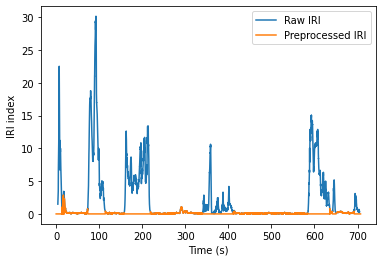

In [7]:
# plt.plot(times_list, reset_out_iri_list, label='preprocessed IRI (IRI=0 when 3Dspeed<1m/s)')
plt.plot(times_list, out_iri_list, label='Raw IRI')
plt.plot(times_list, reset_out_iri_list, label='Preprocessed IRI')
# plt.plot(times_list[peaks], x[peaks], "o", color='red', label='peaks')
# plt.plot(times_list[peaks], x[peaks], "o", color='red', label='IRI>{0}, bump'.format(str(thres)))
# plt.plot([72.5, 635], [0.8, 0.8], "^", color='green', label='1>IRI>0.5, head turning')
plt.xlabel('Time (s)')
plt.ylabel('IRI index')
plt.legend()
# plt.show()
plt.savefig('explain_IRI_disadvantages_update.eps', format='eps')

In [6]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
     
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [20]:
n_list = np.array(times_list)[peaks].tolist()
new_n_list = []
for n in n_list:
    new_n_list.append(convert(n))
    print(n)
set(new_n_list)

13.227791878172589
15.065659898477156
15.598807106598985
15.654644670050763
15.812005076142132
16.11149746192893
16.223172588832487
16.791852791878174
16.802005076142134
16.827385786802033
16.873071065989848
16.99489847715736
19.131421319796956
19.7102538071066
20.121421319796955
20.395454545454545
290.35604060913704
290.5489340101523
290.6861421319797
290.7369035532995
290.7775126903553
290.93487309644667
291.1379187817259
291.23944162436544
291.4577157360406
291.7624365482234


{'0:00:13', '0:00:15', '0:00:16', '0:00:19', '0:00:20', '0:04:50', '0:04:51'}

In [25]:
peaks

array([ 2337,  2703,  2810,  2821,  2852,  2911,  2933,  3047,  3049,
        3054,  3063,  3087,  3501,  3617,  3698,  3754, 57108, 57146,
       57175, 57185, 57193, 57224, 57264, 57284, 57327, 57389])

In [28]:
times_list[56250]

285.99078680203047

In [24]:
convert(286)

'0:04:46'